### Linear Regression With Multiple Features
- Theta(Transpose)*x

### Breast Cancer Analysis
- Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast_cancer = load_breast_cancer() # making an object.
X = breast_cancer.data
Y = breast_cancer.target


In [4]:
print(X, Y)
print(X.shape, Y.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [5]:
# I am going to use some  pre-defined features of of the data already given in sklearn

In [6]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
df = pd.DataFrame(X)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.columns = breast_cancer.feature_names
df.head(n =3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
df.describe()

In [102]:
# this data is not normalized , first we need  to normalize the data though:

In [103]:
mean = np.mean( df, axis = 0)
standard_deviaiton = np.std(df, axis = 0)
print(mean.shape, standard_deviaiton.shape)

(30,) (30,)


In [104]:
df = (df - mean)/ standard_deviaiton # normalizes the data
df.head(n=5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Plot Y vs Any Features

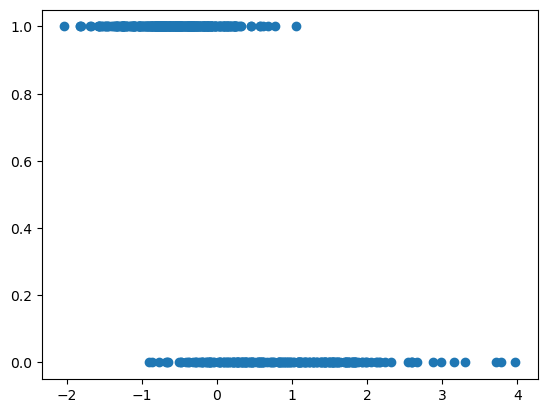

In [105]:
import matplotlib.pyplot as plt
plt.scatter(df["mean radius"], Y) # so bascially it not regression but classficstio n

### Linear Multiple Regression :

In [106]:
df.shape , Y.shape,type(X)

((569, 30), (569,), numpy.ndarray)

In [107]:
# we will add x0 feature , ie we will add column with each element with 1 

In [108]:
ones = np.ones((569,1))


In [109]:
# Now how to add this column to this matrix X.

In [110]:
df = np.hstack((ones, df)) # converts df to array and adds entire column

In [111]:
print(df.shape)

(569, 31)


In [113]:
type(df)

numpy.ndarray

In [112]:
print(df) #0th column is for x nod.

[[ 1.          1.09706398 -2.07333501 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.          1.82982061 -0.35363241 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.          1.57988811  0.45618695 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 1.          0.70228425  2.0455738  ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.          1.83834103  2.33645719 ...  2.28998549  1.91908301
   2.21963528]
 [ 1.         -1.80840125  1.22179204 ... -1.74506282 -0.04813821
  -0.75120669]]


In [115]:
df[0:4 , 0:4] # 3X3 matirx

array([[ 1.        ,  1.09706398, -2.07333501,  1.26993369],
       [ 1.        ,  1.82982061, -0.35363241,  1.68595471],
       [ 1.        ,  1.57988811,  0.45618695,  1.56650313],
       [ 1.        , -0.76890929,  0.25373211, -0.59268717]])

In [158]:
# df - Matrix (mXn)
# x - Vector (single Example with n features)
# n is no. features

def hypothesis(x, theta):
    n = x.shape[0]
    
    y_predicted = 0.0
     # means single example
    for i in range(n):
        y_predicted += (theta[i]*x[i]) #0-nodXx-nod , .. sequence goes on
        
    return y_predicted

def error(df, Y, theta):
    e = 0.0
    m = df.shape[0] # no. of examles
    for i in range(m):
        y_predicted = hypothesis(df[i], theta)
        e += (Y[i] - y_predicted)**2
    return e/m
    
def gradient(df, Y, theta): # df is matrix , Y is vector
    m, n = df.shape   # m, n =  569, 31 
    grad = np.zeros((n,)) # 0o, 01,02...
# for all vlaues of features
    for j in range(n):
        # sum over all examples
        for i in range(m):
            y_predicted = hypothesis(df[i], theta)
            grad[j] += ((y_predicted - Y[i])*df[i][j])
    return grad/m

def gradient_descent(df,Y,learning_rate = 0.1, max_epochs=300):#no.of iteration
    m,n = df.shape
    theta = np.zeros((n,))
    error_list = []
     
    for i in range(max_epochs):
        e = error(df, Y, theta)
        error_list.append(e)
        grad = gradient(df,Y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
    return theta, error_list
        
    




In [159]:
import time
start = time.time()
theta, error_list = gradient_descent(df, Y)
end = time.time()
print("Time taken is " , end-start) # quite slow 

Time taken is  20.5138840675354


In [160]:
print(theta)

[ 0.62741652 -0.06339931 -0.02544547 -0.04708532  0.06165352  0.00384835
  0.10027856 -0.05042693 -0.08924554  0.00878418  0.06160413 -0.15012034
  0.00324227 -0.01302168  0.12654253 -0.04281608  0.04086963  0.07548016
 -0.040298   -0.00701259 -0.0097171  -0.12153015 -0.04241122 -0.05510582
  0.07417789 -0.02524717  0.01058474 -0.07899559 -0.07699402 -0.05480938
 -0.08869376]


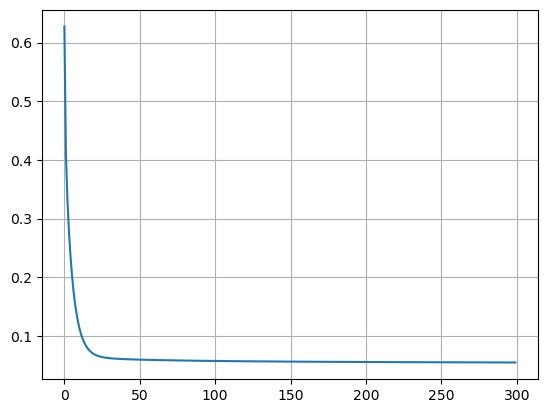

In [163]:
plt.plot(error_list)
plt.grid()
plt.show() 

In [162]:
prediction_list = []

for i in range(m):
    y_predicted = hypothesis(df[i], theta)
    prediction_list.append(y_predicted)
y_predicted = np.array(y_predicted)
y_predicted

array(1.09306443)

### Section -3 Optimising Code Using Vectorization :
- An efficeint Implementation for Linear Regression using Vectorization.
   1) Avoid loops in the implementation, except gradient descent main loop.
   2) Use numpy functions like np.sum(), np.dot() which are quite fast and already optimised.

In [ ]:
def hypothesis(df, theta):
    return np.dot(df, theta) 

In [ ]:
def error(df,Y, theta):
    error = 0.0
    m = X.shape[0]
    y_predicted = hypothesis(df, theta)
    e = np.sum((Y -y_predicted)**2)
    return e/m

def gradient(df, Y, theta):
    m  =  df.shape[0]
    y_predicted = hypothesis(df, theta)
    grad = np.dot(df.T, (y_predicted - Y)) 
    return grad/m
        
        



In [ ]:
def gradient_descent(df, Y, lr = 0.1, max_iters = 300):
    m = df.shape[0]
    n = df.shape[1]
    theta  = np.zeros((n,))
    error_list =[]

    for i in range(max_iters):
        e = error(df, Y, theta)
        error_list.append(e)
        grad = gradient(df, Y, theta)
        theta = theta - lr*grad
    return theta , error_list
    


In [ ]:
import time
start = time.time()
theta , error_list =gradient_descent(df, Y)
end = time.time()
print("time taken is", end- start)

In [ ]:
theta 

In [ ]:
error_list

In [ ]:
plt.plot(error_list)
plt.grid()
plt.show()
